
## In Class Activity

### Iris Flower Analysis with Pandas
**Duration:** 20-25 minutes | **Teams:** 3 students each

#### Dataset: Iris Flower Dataset
**Download Instructions:**
The Iris dataset is built into seaborn, so no download needed!

In [8]:
import pandas as pd
import seaborn as sns

# Load the Iris dataset directly
iris = sns.load_dataset('iris')

In [9]:
# Replace 0 and '[]' with the correct methods on iris
print(f"Dataset shape: {iris.shape}")
print(f"Columns: {iris.columns}")

# Look at the first few rows
print("First 5 rows:")
print(iris.head())

# Get basic info about the dataset
print("\nDataset Info:")
print(iris.info())

# Describe the dataset with summary statistics
print("\nSummary Statistics:")
print(iris.describe())

Dataset shape: (150, 5)
Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory us

In [10]:
# Create petal area column
iris['petal_area'] = iris['petal_length']*iris['petal_width']

# Create sepal area column
iris['sepal_area'] = iris['sepal_length']*iris['sepal_width']

# Create size category column
def categorize_size(row):
    if row.petal_area < 2 :
        return 'Small'
    elif row.petal_area <= 5 :
        return 'Medium'
    else:
        return 'Large'

iris['size_category'] = iris.apply(categorize_size, axis=1)

print("New columns created:")
print(iris[['petal_length', 'petal_width', 'petal_area', 'size_category']].head(10))

New columns created:
   petal_length  petal_width  petal_area size_category
0           1.4          0.2        0.28         Small
1           1.4          0.2        0.28         Small
2           1.3          0.2        0.26         Small
3           1.5          0.2        0.30         Small
4           1.4          0.2        0.28         Small
5           1.7          0.4        0.68         Small
6           1.4          0.3        0.42         Small
7           1.5          0.2        0.30         Small
8           1.4          0.2        0.28         Small
9           1.5          0.1        0.15         Small


In [11]:
# Find all 'setosa' species flowers
setosa_flowers = iris[iris['species'] == 'setosa']
print(f"Setosa flowers: {len(setosa_flowers)} out of {len(iris)}")

# Filter for large flowers only
large_flowers = iris[iris['size_category'] == 'Large']
print(f"Large flowers: {len(large_flowers)} out of {len(iris)}")

# Find flowers with sepal_length > 6
long_sepal = iris[iris['sepal_length'] > 6]
print(f"Flowers with sepal_length > 6: {len(long_sepal)} out of {len(iris)}")


Setosa flowers: 50 out of 150
Large flowers: 87 out of 150
Flowers with sepal_length > 6: 61 out of 150


In [12]:
# Count flowers by species
species_counts = iris['species'].value_counts()
print("Flowers by species:")
print(species_counts)

# Find average petal length by species
avg_petal_by_species = iris.groupby('species')['petal_length'].mean()
print("\nAverage petal length by species:")
print(avg_petal_by_species)

Flowers by species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Average petal length by species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


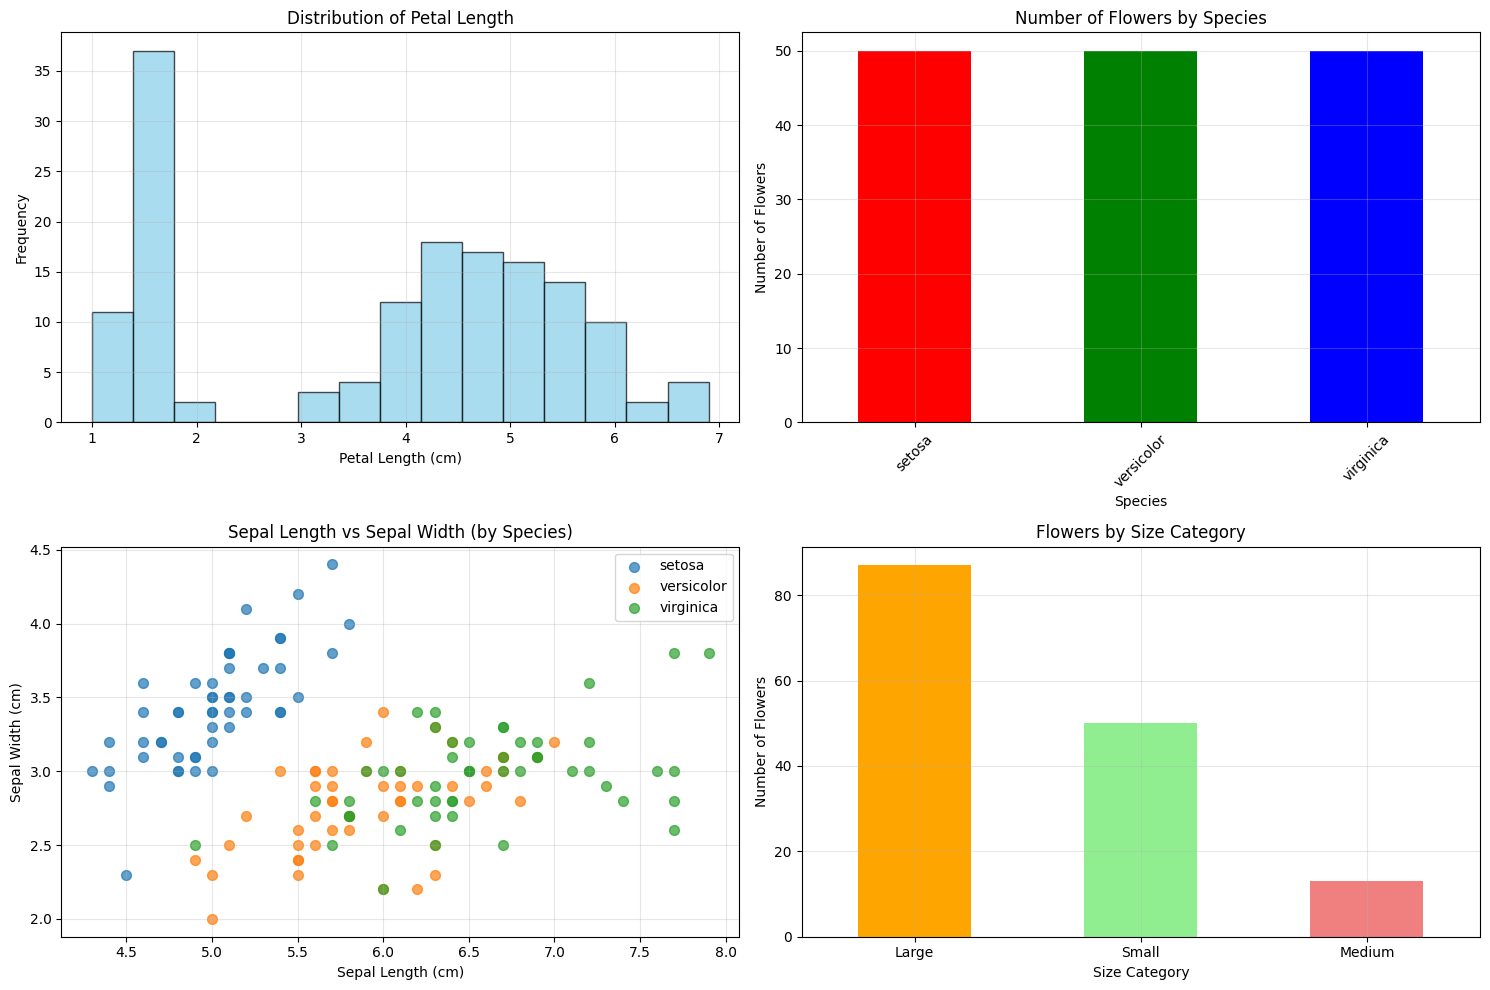

In [13]:
# Create a figure with subplots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram of petal length
axes[0, 0].hist(iris['petal_length'], bins=15, alpha=0.7, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Distribution of Petal Length')
axes[0, 0].set_xlabel('Petal Length (cm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Bar chart of flower count by species
species_counts = iris['species'].value_counts()
species_counts.plot(kind='bar', ax=axes[0, 1], color=['red', 'green', 'blue'])
axes[0, 1].set_title('Number of Flowers by Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Number of Flowers')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter plot: sepal_length vs sepal_width
for species in iris['species'].unique():
    data = iris[iris['species'] == species]
    axes[1, 0].scatter(data['sepal_length'], data['sepal_width'],
                      alpha=0.7, label=species, s=50)
axes[1, 0].set_title('Sepal Length vs Sepal Width (by Species)')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Sepal Width (cm)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Bar chart of size categories (if size_category column exists)
if 'size_category' in iris.columns:
    size_categories = iris['size_category'].value_counts()
    size_categories.plot(kind='bar', ax=axes[1, 1], color=['orange', 'lightgreen', 'lightcoral'])
    axes[1, 1].set_title('Flowers by Size Category')
    axes[1, 1].set_xlabel('Size Category')
    axes[1, 1].set_ylabel('Number of Flowers')
    axes[1, 1].tick_params(axis='x', rotation=0)
    axes[1, 1].grid(True, alpha=0.3)
else:
    # Alternative: petal length vs petal width scatter
    axes[1, 1].scatter(iris['petal_length'], iris['petal_width'], alpha=0.7, s=50)
    axes[1, 1].set_title('Petal Length vs Petal Width')
    axes[1, 1].set_xlabel('Petal Length (cm)')
    axes[1, 1].set_ylabel('Petal Width (cm)')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Upon Completion:**

Execute all the cells, save and download the notebook and submit to Gradescope.
